# Distribution of cosine distance for minimal syntax pairs

In [1]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
import os, sys, time, re
import matplotlib.pyplot as plt
import pickle
from scipy.spatial.distance import cosine
import seaborn as sns

%matplotlib inline

## Load simple agreement pairs from Marvin (2018)

"Targeted Syntactic Evaluation of Language Models" by Marvin and Linzen (2018).
https://github.com/BeckyMarvin/LM_syneval

In [2]:
with open('../data/marvin_templates/simple_agrmt.pickle', 'rb') as f:
  data = pickle.load(f)
  data = data['sing_MS_MV']

In [3]:
len(data)

70

In [4]:
data[:5]

[('the author laughs', 'the author laugh'),
 ('the author swims', 'the author swim'),
 ('the author smiles', 'the author smile'),
 ('the author is tall', 'the author are tall'),
 ('the author is old', 'the author are old')]

## Load BERT

In [5]:
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=False)

In [6]:
def evaluate_contextual_diff(pair):
    source, target = pair[0], pair[1]
    src_ids = torch.tensor(bert_tokenizer.encode(source)).unsqueeze(0)
    src_vec = bert_model(src_ids)[0].mean(dim=1)[0]  # (768,) torch.tensor
    
    tgt_ids = torch.tensor(bert_tokenizer.encode(target)).unsqueeze(0)
    tgt_vec = bert_model(tgt_ids)[0].mean(dim=1)[0]
    
    d_emb = len(src_vec)  # 768
    diff = src_vec - tgt_vec
    return diff # 768-dimensional torch.tensor

## Evaluate and plot

In [7]:
vecs = np.stack([evaluate_contextual_diff(pair).detach().numpy() for pair in data])

In [8]:
cosine_distances = []
for i in range(len(vecs)):
  for j in range(i+1, len(vecs)):
    cosine_distances.append(cosine(vecs[i,:], vecs[j,:]))

/h/bai/moar/bai-conda/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


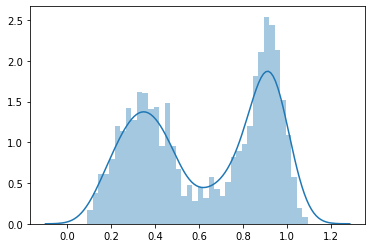

In [9]:
sns.distplot(cosine_distances, bins=40)